<a href="https://colab.research.google.com/github/Nikita921999/project/blob/main/Car_Price_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
cars = pd.read_csv("drive/MyDrive/car price prediction/Car details.csv")
cars.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [ ]:
cars.shape

(8128, 13)

In [ ]:
cars.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [ ]:
cars = cars.dropna(how='any')

In [ ]:
cars.shape

(7906, 13)

In [ ]:
import re

In [ ]:
res = '190Nm@ 2,000rpm'.replace(".","")
res = res.replace(",","")
a = [int(s) for s in re.findall(r'\d+',res)]
a

[190, 2000]

In [ ]:
torque_list = cars['torque'].to_list()
torque_rpm = []
def extractingRPM(x):
  for item in x:
    res = item.replace(".","")
    res = item.replace(",","")
    temp = [int(s) for s in re.findall(r'\d+', res)]
    torque_rpm.append(max(temp))

extractingRPM(torque_list)
print(torque_list[:2])
print(torque_rpm[:2])

['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm']
[2000, 2500]


In [ ]:
cars["torque_rpm"] = torque_rpm

In [ ]:
cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500


In [ ]:
mil_list = cars['mileage'].to_list()
mil_kmpl = []
def extractingmil(x):
  for items in x:
    temp = []
    try:
      for s in items.split(" "):
        temp.append(float(s))
    except:
      pass
    mil_kmpl.append(max(temp))

extractingmil(mil_list)
print(mil_list[:2])
print(mil_kmpl[:2])

['23.4 kmpl', '21.14 kmpl']
[23.4, 21.14]


In [ ]:
cars["mil_kmpl"] = mil_kmpl

In [ ]:
cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14


In [ ]:
engine_list = cars["engine"].to_list()
engine_cc = []

def extractingEngine(x):
  for items in x:
    temp = []
    try:
      for s in items.split(" "):
        temp.append(float(s))
    except:
      pass
    engine_cc.append(max(temp))

extractingEngine(engine_list)
print(engine_list[:2])
print(engine_cc[:2])

['1248 CC', '1498 CC']
[1248.0, 1498.0]


In [ ]:
cars["engine_cc"] = engine_cc

In [ ]:
cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0


In [ ]:
power_list = cars["max_power"].to_list()
max_power = []

def extractingPower(x):
  for items in x:
    temp = []
    try:
      for s in items.split(" "):
        temp.append(float(s))
    except:
      pass
    max_power.append(max(temp))

extractingPower(power_list)
print(power_list[:2])
print(max_power[:2])


['74 bhp', '103.52 bhp']
[74.0, 103.52]


In [ ]:
cars["max_power_new"] = max_power

In [ ]:
cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0,103.52


In [ ]:
cars_new = cars.drop(['mileage', 'engine', 'max_power', 'torque'], axis = 1)

In [ ]:
cars_new.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,2500,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,2700,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,2750,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,4500,16.10,1298.0,88.20


In [ ]:
cars_new.describe()

,year,selling_price,km_driven,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393,3069.864154,19.419861,1458.708829,91.587374
std,3.863695,8.135827e+05,5.679230e+04,0.959208,943.662100,4.036263,503.893057,35.747216
min,1994.000000,2.999900e+04,1.000000e+00,2.000000,400.000000,0.000000,624.000000,32.800000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000,2400.000000,16.780000,1197.000000,68.050000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,3000.000000,19.300000,1248.000000,82.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000,4000.000000,22.320000,1582.000000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,21800.000000,42.000000,3604.000000,400.000000


In [ ]:
# The ranges for all the columns are all over the place so we might have to normalize some columns or standardize
# the dataset.

<ipython-input-26-0aaf96a94cf1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cars_new.corr(),annot=True,cmap='viridis',linewidths=.5)


<Axes: >

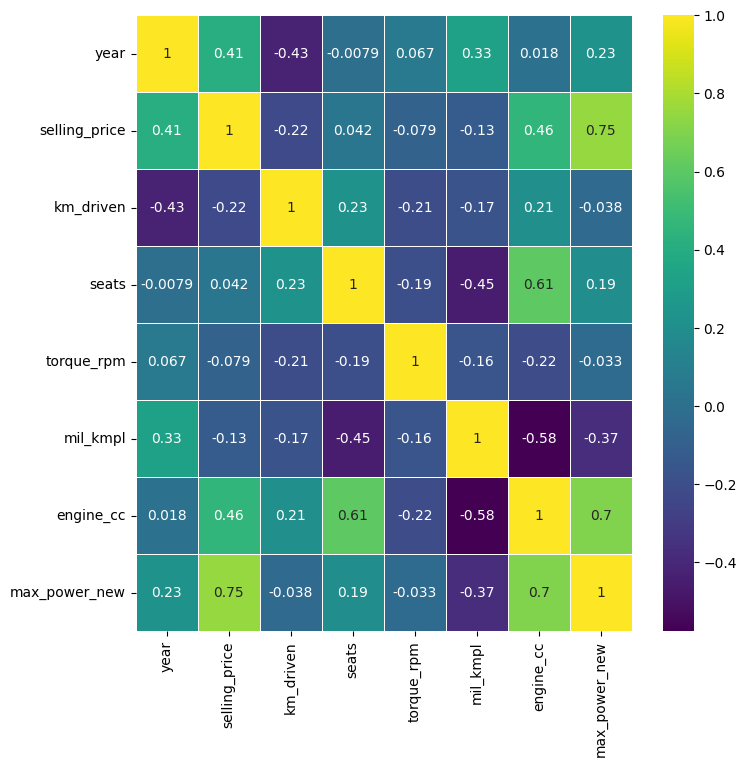

In [ ]:
#Applicable for numerical columns in my dataset not categorical columns
plt.figure(figsize=(8,8))
sns.heatmap(cars_new.corr(),annot=True,cmap='viridis',linewidths=.5)

In [ ]:
# We can see there is high correlation of selling price(which we will be predicting) with max_power output of the car
# The values of correlation are pretty averaged out meaning we wont be excluding any clumn as each column is able to provide us with new
# information that is not provided by any other column.

In [ ]:
#Dealing with categorical

cars_new

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,2500,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,2700,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,2750,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,4500,16.10,1298.0,88.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,5.0,4000,18.50,1197.0,82.85
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,5.0,2750,16.80,1493.0,110.00
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,5.0,2000,19.30,1248.0,73.90
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,5.0,3000,23.57,1396.0,70.00


In [ ]:
# Our journey for finding categorical data.

cars_new['fuel'].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [ ]:
cars_new['seller_type'].value_counts()

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [ ]:
cars_new['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

In [ ]:
cars_new['owner'].value_counts()

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

In [ ]:
# Converting categorical data to integer format.

def ref1(x):
  if x == 'Manual':
    return 1
  else:
    return 0

cars_new['transmission'] = cars_new['transmission'].map(ref1)

In [ ]:
def ref2(x):
  if x == 'Individual':
    return 1
  elif x == 'Dealer':
    return 0
  else:
    return -1

cars_new['seller_type'] = cars_new['seller_type'].map(ref2)

In [ ]:
def ref3(x):
  if x == 'Petrol':
    return 1
  elif x == 'Diesel':
    return 0
  else:
    return -1

cars_new['fuel'] = cars_new['fuel'].map(ref3)

In [ ]:
owners = pd.get_dummies(cars_new['owner'])

cars_dataset = pd.concat([cars_new, owners], axis=1)

In [ ]:
cars_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,0,1,1,First Owner,5.0,2000,23.40,1248.0,74.00,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,1,1,Second Owner,5.0,2500,21.14,1498.0,103.52,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,1,1,Third Owner,5.0,2700,17.70,1497.0,78.00,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,1,1,First Owner,5.0,2750,23.00,1396.0,90.00,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,1,1,First Owner,5.0,4500,16.10,1298.0,88.20,1,0,0,0,0


In [ ]:
cars_dataset_new = cars_dataset.drop(['name', 'owner'], axis = 1)

In [ ]:
cars_dataset_new.head(5)

,year,selling_price,km_driven,fuel,seller_type,transmission,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2014,450000,145500,0,1,1,5.0,2000,23.40,1248.0,74.00,1,0,0,0,0
1,2014,370000,120000,0,1,1,5.0,2500,21.14,1498.0,103.52,0,0,1,0,0
2,2006,158000,140000,1,1,1,5.0,2700,17.70,1497.0,78.00,0,0,0,0,1
3,2010,225000,127000,0,1,1,5.0,2750,23.00,1396.0,90.00,1,0,0,0,0
4,2007,130000,120000,1,1,1,5.0,4500,16.10,1298.0,88.20,1,0,0,0,0


In [ ]:


cars_dataset_new['car_selling_price'] = cars_dataset_new['selling_price']

In [ ]:
cars_dataset_new.head(5)

,year,selling_price,km_driven,fuel,seller_type,transmission,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,car_selling_price
0,2014,450000,145500,0,1,1,5.0,2000,23.40,1248.0,74.00,1,0,0,0,0,450000
1,2014,370000,120000,0,1,1,5.0,2500,21.14,1498.0,103.52,0,0,1,0,0,370000
2,2006,158000,140000,1,1,1,5.0,2700,17.70,1497.0,78.00,0,0,0,0,1,158000
3,2010,225000,127000,0,1,1,5.0,2750,23.00,1396.0,90.00,1,0,0,0,0,225000
4,2007,130000,120000,1,1,1,5.0,4500,16.10,1298.0,88.20,1,0,0,0,0,130000


In [ ]:
car = cars_dataset_new.drop(['selling_price'], axis=1)

In [ ]:
car.head(5)

,year,km_driven,fuel,seller_type,transmission,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,car_selling_price
0,2014,145500,0,1,1,5.0,2000,23.40,1248.0,74.00,1,0,0,0,0,450000
1,2014,120000,0,1,1,5.0,2500,21.14,1498.0,103.52,0,0,1,0,0,370000
2,2006,140000,1,1,1,5.0,2700,17.70,1497.0,78.00,0,0,0,0,1,158000
3,2010,127000,0,1,1,5.0,2750,23.00,1396.0,90.00,1,0,0,0,0,225000
4,2007,120000,1,1,1,5.0,4500,16.10,1298.0,88.20,1,0,0,0,0,130000


In [ ]:
X = car.iloc[:, :-1].values
y = car.iloc[:, -1].values



In [ ]:
print(y)

[450000 370000 158000 ... 382000 290000 290000]


In [ ]:
print(X)

[[2.01e+03 1.46e+05 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.01e+03 1.20e+05 0.00e+00 ... 1.00e+00 0.00e+00 0.00e+00]
 [2.01e+03 1.40e+05 1.00e+00 ... 0.00e+00 0.00e+00 1.00e+00]
 ...
 [2.01e+03 1.20e+05 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.01e+03 2.50e+04 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [2.01e+03 2.50e+04 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]]


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [ ]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(Xtest)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), ytest.reshape(len(ytest),1)),1))

[[ 706345.02  710000.  ]
 [ 524910.33  530000.  ]
 [1253120.81  503000.  ]
 ...
 [ 635745.53  720000.  ]
 [ 575101.69  690000.  ]
 [  -3481.27  130000.  ]]


In [ ]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(ytest, y_pred)

0.6753726254048957

In [ ]:
print(round(regressor.score(Xtrain, ytrain), 2))

0.69


In [ ]:
print(round(regressor.score(Xtest, ytest), 2))

0.68
